In [73]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")

base_1 = pd.read_csv('results/BaseSympModel0_HW=0.98_NW=0.017_FW=0.407_TransR=1.28_RecR=0.056_ProgR=0.196_HospR=0.088_CritR=0.7323464443258964_DeathR=0.75_initI_S=1_initI_A=1_T=200.csv', index_col=0)
base_2 = pd.read_csv('results/BaseSympModel1_HW=0.98_NW=0.017_FW=0.407_TransR=1.28_RecR=0.056_ProgR=0.196_HospR=0.088_CritR=0.7323464443258964_DeathR=0.75_initI_S=1_initI_A=1_T=200.csv', index_col=0)
base_3 = pd.read_csv('results/BaseSympModel2_HW=0.98_NW=0.017_FW=0.407_TransR=1.28_RecR=0.056_ProgR=0.196_HospR=0.088_CritR=0.7323464443258964_DeathR=0.75_initI_S=1_initI_A=1_T=200.csv', index_col=0)

In [74]:
base_1['Infected'] = base_1['Infected_Presymptomatic'] + base_1['Infected_Symptomatic'] + base_1['Infected_Asymptomatic']
base_2['Infected'] = base_2['Infected_Presymptomatic'] + base_2['Infected_Symptomatic'] + base_2['Infected_Asymptomatic']
base_3['Infected'] = base_3['Infected_Presymptomatic'] + base_3['Infected_Symptomatic'] + base_3['Infected_Asymptomatic']

In [75]:
print(np.argmax(base_1['Infected'].values), max(base_1['Infected']))
print(np.argmax(base_2['Infected'].values), max(base_2['Infected']))
print(np.argmax(base_3['Infected'].values), max(base_3['Infected']))

33 12993.0
35 13041.0
29 12990.0


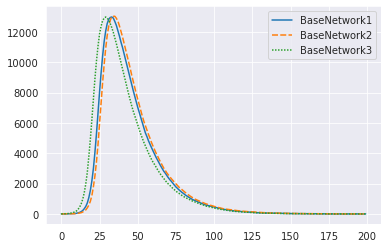

In [77]:
infected_nums = pd.DataFrame({'BaseNetwork1': base_1['Infected'].values,
                              'BaseNetwork2': base_2['Infected'].values,
                              'BaseNetwork3': base_3['Infected'].values})

sns.lineplot(data=infected_nums)

In [64]:
print(np.argmax(base_1['Hospitalized'].values), max(base_1['Hospitalized']))
print(np.argmax(base_2['Hospitalized'].values), max(base_2['Hospitalized']))
print(np.argmax(base_3['Hospitalized'].values), max(base_3['Hospitalized']))

46 69.0
41 71.0
36 53.0


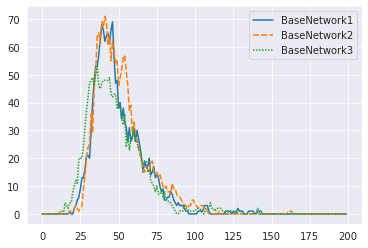

In [78]:
hospitalized_nums = pd.DataFrame({'BaseNetwork1': base_1['Hospitalized'].values,
                                  'BaseNetwork2': base_2['Hospitalized'].values,
                                  'BaseNetwork3': base_3['Hospitalized'].values})

sns.lineplot(data=hospitalized_nums)

In [79]:
print(sum(base_1['Hospitalized'].values))
print(sum(base_2['Hospitalized'].values))
print(sum(base_3['Hospitalized'].values))

1927.0
2119.0
1849.0


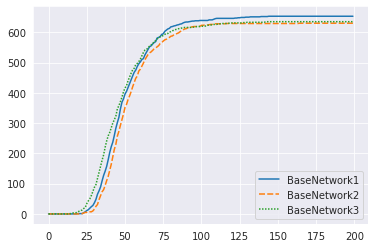

In [80]:
fatalities_nums = pd.DataFrame({'BaseNetwork1': base_1['Fatalities'].values,
                                'BaseNetwork2': base_2['Fatalities'].values,
                                'BaseNetwork3': base_3['Fatalities'].values})

sns.lineplot(data=fatalities_nums)

In [81]:
print(max(base_1['Infected_Symptomatic'].values))
print(max(base_2['Infected_Symptomatic'].values))
print(max(base_3['Infected_Symptomatic'].values))

3669.0
3815.0
3593.0


In [82]:
base_1['delta_Fatalities'] = base_1['Fatalities'].diff()
base_2['delta_Fatalities'] = base_2['Fatalities'].diff()
base_3['delta_Fatalities'] = base_3['Fatalities'].diff()

base_1.fillna(value=0, inplace=True)
base_2.fillna(value=0, inplace=True)
base_3.fillna(value=0, inplace=True)

print(np.argmax(base_1['delta_Fatalities'].values), max(base_1['delta_Fatalities'].values))
print(np.argmax(base_2['delta_Fatalities'].values), max(base_2['delta_Fatalities'].values))
print(np.argmax(base_3['delta_Fatalities'].values), max(base_3['delta_Fatalities'].values))

47 28.0
45 27.0
37 25.0


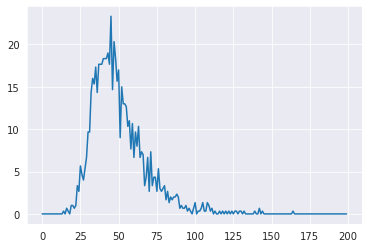

In [83]:
fatalities_rates = pd.DataFrame({'BaseNetwork1': base_1['delta_Fatalities'].values,
                                 'BaseNetwork2': base_2['delta_Fatalities'].values,
                                 'BaseNetwork3': base_3['delta_Fatalities'].values})

fatalities_rates['avg'] = (fatalities_rates['BaseNetwork1'] + fatalities_rates['BaseNetwork2'] + fatalities_rates['BaseNetwork3']) / 3

sns.lineplot(data=fatalities_rates['avg'])